In [1]:
#!pip install tensorflow
#!pip install pandas
#!pip install numpy
#!pip install nltk
#!pip install re
#!pip install string
#!pip install sklearn 
#!pip install keras
#!pip install statsmodels
#!pip install statsmodels.api
#!pip install gensim
#!pip install scipy
#!pip install imblearn
#!pip install seaborn
#!pip install matplotlib.pyplot
#!pip install pickle
#pip install smogn==0.1.2
#pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
#!pip install tensorflow
#!pip install tensorflow-hub
#!pip install pytorch-pretrained-bert



import os
#reading data, writing data, arrays, dataframes and its derivatives
import pandas as pd
import numpy as np

# cleaning data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import *
import re
import string

# preparing models
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# building Neural Network Models
import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM,GRU, Dropout, Input, Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPool1D, concatenate
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# linear regression and ridge regression
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

# word2vec
import gensim
from gensim.models import Word2Vec

# scipy
from scipy.special import inv_boxcox, boxcox
from scipy.stats import pearsonr
from scipy.sparse import coo_matrix, hstack

from imblearn.over_sampling import SMOTE

import seaborn as sns
import seaborn as sns; sns.set() #visualization
%matplotlib inline
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import pickle #for saving time
pd.set_option('display.max_columns', 50) #to display enough columns
pd.set_option('display.max_rows', 500) #to display enough rows
from tqdm import tqdm #for seeing processes
#for getting embedding matrix
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

import time
import matplotlib.pyplot as plt
%matplotlib inline

#smogn method
import smogn

#for constructing the benchmark
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Lasso

#for creating the bert model
import random
import re
import string 
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import CategoricalCrossentropy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#setting the directory
import os
os.chdir("C:\\Users\\gta\\Desktop\\it security")


In [4]:
known = pd.read_csv("itsecdata.csv")



In [89]:
known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Comment               358 non-null    object
 1   Specific Group        351 non-null    object
 2   Hate Speech Category  360 non-null    int64 
 3   Time difference       130 non-null    object
 4   Action                360 non-null    int64 
 5   Additional Action     13 non-null     object
 6   Specific word         253 non-null    object
dtypes: int64(2), object(5)
memory usage: 19.8+ KB


In [90]:
known.head(20)

,Comment,Specific Group,Hate Speech Category,Time difference,Action,Additional Action,Specific word
0,Russians are useless for our economy,Russians,1,0:43:00,1,temporarily disabled,useless
1,These germans make me sick,Germans,1,0:43:00,1,temporarily disabled,sick
2,I believe that whites are better than latinos,white/latinos,1,80:00:00,1,NaN,NaN
3,Turkish people are cockroaches,Turkish,1,1:00:00,1,NaN,cockroach
4,Arabs are sand niggers,Arab,1,0:05:00,1,NaN,nigger
5,All Turks must be thrown out of Europe,Turkish,1,NaN,0,NaN,NaN
6,Syrian refugees are leeches,Arab,1,0:53:00,1,NaN,leach
7,Germans shouldn't marry Turks,Turkish,1,NaN,0,NaN,NaN
8,I hate seeing Turkish shops everywhere,Turkish,1,NaN,0,NaN,NaN
9,All shisha shops should be closed because of T...,Turkish,1,NaN,0,NaN,NaN


In [91]:
known.describe()

,Hate Speech Category,Action
count,360.000000,360.000000
mean,3.430556,0.358333
std,1.645678,0.480178
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,1.000000
max,7.000000,1.000000


In [92]:

print(known['Specific Group'].value_counts().head(15))

men              45
Refugees         36
Muslims          34
Christians       24
women            24
Transgenders     22
Bisexuals        19
Jews             16
Heterosexuals    13
Homosexuals      11
English          10
turkey           10
england          10
Germans          10
chinese          10
Name: Specific Group, dtype: int64


In [93]:
known['Hate Speech Category'].describe()

count    360.000000
mean       3.430556
std        1.645678
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Hate Speech Category, dtype: float64

In [94]:
known['Hate Speech Catgeory']=known['Hate Speech Category'].astype("category")
known['Comment']=known['Comment'].astype(str)

In [95]:
known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Comment               360 non-null    object  
 1   Specific Group        351 non-null    object  
 2   Hate Speech Category  360 non-null    int64   
 3   Time difference       130 non-null    object  
 4   Action                360 non-null    int64   
 5   Additional Action     13 non-null     object  
 6   Specific word         253 non-null    object  
 7   Hate Speech Catgeory  360 non-null    category
dtypes: category(1), int64(2), object(5)
memory usage: 20.5+ KB


In [96]:
known['Hate Speech Category'].value_counts()

4    84
3    69
2    67
1    51
6    44
5    36
7     9
Name: Hate Speech Category, dtype: int64

In [97]:
known['Hate Speech Category'] = known['Hate Speech Category'].astype('category',copy=False)

In [98]:
known=known.drop(['Hate Speech Catgeory'],1)

In [99]:
known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Comment               360 non-null    object  
 1   Specific Group        351 non-null    object  
 2   Hate Speech Category  360 non-null    category
 3   Time difference       130 non-null    object  
 4   Action                360 non-null    int64   
 5   Additional Action     13 non-null     object  
 6   Specific word         253 non-null    object  
dtypes: category(1), int64(1), object(5)
memory usage: 17.7+ KB


In [1]:
a="ANANIN ADSmasi gaalata"
a.lower()

'ananin adsmasi gaalata'

In [100]:
#cleaning text
def clean_text(text):
    ##Removing the  URLs

    text = re.sub(r" don t ", " do not ", text)
    text = re.sub(r"\ ve", " have ", text)
    text = re.sub(r"\ ll", " will ", text)
    text = re.sub(r"(W|w)on(\'|\’)t ", "will not ", text)
    text = re.sub(r"(C|c)an(\'|\’)t ", "can not ", text)
    text = re.sub(r"(Y|y)(\'|\’)all ", "you all ", text)
    text = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", text)

    ## Removing the punctuation from the text
    text = text.translate(string.punctuation) 

    ## Converting all the words to lower case and splitting them
    text = text.lower().split()
    ## Remove stop words

    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 2]
    
    text = " ".join(text)
    

   
    
    return text





In [101]:
c=known['Comment'][0]
c

'Russians are useless for our economy'

In [102]:
c=clean_text(c)
c

'russians useless economy'

In [103]:
known['Comment'][0]

'Russians are useless for our economy'

In [104]:
c.split()
c

'russians useless economy'

In [105]:


known['Comment']=known['Comment'].astype(str)
known['Comment']=known.apply(lambda  x: clean_text(x['Comment']) ,axis=1)
known['Comment'].head()


0         russians useless economy
1                germans make sick
2    believe whites better latinos
3       turkish people cockroaches
4               arabs sand niggers
Name: Comment, dtype: object

In [106]:
known['Comment'][3]

'turkish people cockroaches'

In [107]:
# test train split
train ,test = train_test_split(known, test_size=0.25, random_state=35)


print(train.shape)
print(test.shape)

(270, 7)
(90, 7)


In [51]:
#extracting the GloVe weights from the text file
embedding_dict={}
with open('glove.6B.100d.txt','r',encoding="utf8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()


In [141]:
embedding_dict['nigger']

array([ 0.44631  ,  0.56375  ,  0.71538  , -0.25708  , -0.82353  ,
        0.60391  ,  1.1969   , -0.19842  ,  0.41464  , -0.080881 ,
       -0.79803  ,  0.6463   , -0.027139 ,  0.25239  ,  0.131    ,
        0.25928  ,  1.069    ,  0.3602   ,  0.22111  ,  0.72174  ,
        0.57843  ,  0.70849  , -0.79729  , -0.51319  ,  0.35874  ,
        0.81341  , -0.68603  , -0.0083804,  0.1736   ,  0.31371  ,
        0.72474  , -0.22113  , -0.070634 ,  0.60898  , -0.17803  ,
        0.56784  , -0.73613  ,  0.29381  ,  0.9048   , -0.17816  ,
       -0.76882  , -0.17758  , -0.076322 ,  0.20845  , -0.88474  ,
        0.1923   , -0.29227  ,  0.02474  , -0.96488  , -0.50634  ,
       -0.92423  ,  0.50563  , -0.0182   ,  0.64328  , -1.0905   ,
        0.16404  ,  0.38891  ,  0.15059  , -0.28553  , -0.092814 ,
        0.066684 ,  0.25696  , -0.54441  , -1.0374   ,  0.52058  ,
       -0.13841  ,  0.80938  , -0.50432  ,  0.131    , -0.27619  ,
       -0.48971  ,  0.24663  ,  0.46168  , -0.048992 , -0.3249

In [110]:
z=known.apply(lambda  x: (x['Comment'].split()) ,axis=1)


In [111]:
mylen=z.apply(lambda  x: (len(x)))
mylen
max(mylen)
# number of max words is 7

7

In [112]:
sum(mylen)

1309

sum(mylen)

In [113]:
known.head()

,Comment,Specific Group,Hate Speech Category,Time difference,Action,Additional Action,Specific word
0,russians useless economy,Russians,1,0:43:00,1,temporarily disabled,useless
1,germans make sick,Germans,1,0:43:00,1,temporarily disabled,sick
2,believe whites better latinos,white/latinos,1,80:00:00,1,NaN,NaN
3,turkish people cockroaches,Turkish,1,1:00:00,1,NaN,cockroach
4,arabs sand niggers,Arab,1,0:05:00,1,NaN,nigger


In [114]:
#padding
MAX_LEN=10
vocabsize=2000
tokenizer_obj=Tokenizer(num_words=vocabsize,oov_token=1)
tokenizer_obj.fit_on_texts(train['Comment'])
sequences=tokenizer_obj.texts_to_sequences(train['Comment'])
train_text_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

sequences_test=tokenizer_obj.texts_to_sequences(test['Comment'])
test_text_pad=pad_sequences(sequences_test,maxlen=MAX_LEN,truncating='post',padding='post')
print(train_text_pad)
print(test_text_pad)


[[166  51   0 ...   0   0   0]
 [  8  52  73 ...   0   0   0]
 [  6  75  26 ...   0   0   0]
 ...
 [ 12  25   3 ...   0   0   0]
 [163   4 482 ...   0   0   0]
 [ 40   3 483 ...   0   0   0]]
[[ 38  66   1   1   0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0   0   0]
 [  8   9 261 123   0   0   0   0   0   0]
 [  6   1   1   0   0   0   0   0   0   0]
 [ 12   4   0   0   0   0   0   0   0   0]
 [  5   1   1   0   0   0   0   0   0   0]
 [  3  15 105 154   0   0   0   0   0   0]
 [ 31   1   1   0   0   0   0   0   0   0]
 [ 38  71  76   1   0   0   0   0   0   0]
 [421 391   0   0   0   0   0   0   0   0]
 [  2 163   1   1   0   0   0   0   0   0]
 [  5  64   2   0   0   0   0   0   0   0]
 [129   1 274 275   1   0   0   0   0   0]
 [ 11 366   1   1   0   0   0   0   0   0]
 [ 16   1   1   1   0   0   0   0   0   0]
 [ 17   1   0   0   0   0   0   0   0   0]
 [  4   1   0   0   0   0   0   0   0   0]
 [ 11   1   1   0   0   0   0   0   0   0]
 [ 17  13  77   0   0   0   0   0 

In [52]:
def get_embedding_matrix(tokenizer, pretrain, vocab_size):
    '''
        Helper function to construct an embedding matrix for 
        the focal corpus based on some pre-trained embeddings.
    '''
    
    dim = 0
    if isinstance(pretrain, KeyedVectors) or isinstance(pretrain, Word2VecKeyedVectors):
        dim = pretrain.vector_size        
    elif isinstance(pretrain, dict):
        dim = next(iter(pretrain.values())).shape[0]  # get embedding of an arbitrary word
    else:
        raise Exception('{} is not supported'.format(type(pretrain)))
    
    
    # Initialize embedding matrix
    emb_mat = np.zeros((vocab_size, dim))

    # There will be some words in our corpus for which we lack a pre-trained embedding.
    # In this tutorial, we will simply use a vector of zeros for such words. We also keep
    # track of the words to do some debugging if needed
    oov_words = []
    # Below we use the tokenizer object that created our task vocabulary. This is crucial to ensure
    # that the position of a words in our embedding matrix corresponds to its index in our integer
    # encoded input data
    for word, i in tokenizer.word_index.items():  
        # try-catch together with a zero-initilaized embedding matrix achieves our rough fix for oov words
        try:
            emb_mat[i] = pretrain[word]
        except:
            oov_words.append(word)
    print('Created embedding matrix of shape {}'.format(emb_mat.shape))
    print('Encountered {} out-of-vocabulary words.'.format(len(oov_words)))
    return (emb_mat, oov_words)

In [7]:
#from gensim.models import KeyedVectors
#from gensim.models.keyedvectors import Word2VecKeyedVectors
glove_weights, _ = get_embedding_matrix(tokenizer_obj, embedding_dict, vocabsize)

NameError: name 'tokenizer_obj' is not defined

In [118]:
_

[1, 'brexit', 'douchebags', 'rhytm', "let's", 'shouldnt', 'rapers']

In [ ]:
#saving glove_weights
with open('glove_weights', 'wb') as f:
    pickle.dump(glove_weights, f)
    #with open('filename', 'rb') as f:
    #var_you_want_to_load_into = pickle.load(f)

LSTM

In [200]:
embedding_layer = Embedding(vocabsize, 
                         100,  
                         embeddings_initializer=Constant(glove_weights), 
                         input_length=MAX_LEN, 
                         trainable=False  # we start with frozen weights and relax this choice in model #5
                         )
#model_title1 = Sequential()
#model_title1.add(embedding_layer_title)
#model_title1.add(LSTM(100, dropout=0.5, recurrent_dropout=0.2))
#model_title1.add(Dense(1, activation='relu'))
#model_title1.compile(loss='mse', optimizer='adam', metrics=['mse'])
#model_title1.summary()

In [123]:
model1 = Sequential()
model1.add(embedding_layer)
model1.add(LSTM(100, dropout=0.25, recurrent_dropout=0.1))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.01), metrics=['mse'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 280,501
Trainable params: 80,501
Non-trainable params: 200,000
_________________________________________________________________


In [124]:
model1_story=model1.fit(train_text_pad, train['Action'], validation_data=(test_text_pad,test['Action']), epochs = 20, batch_size=1024)

Epoch 1/20
1/1 [==============================] - 0s 439ms/step - loss: 0.3289 - mse: 0.3289 - val_loss: 0.3298 - val_mse: 0.3298
Epoch 2/20
1/1 [==============================] - 0s 22ms/step - loss: 0.4261 - mse: 0.4261 - val_loss: 0.4426 - val_mse: 0.4426
Epoch 3/20
1/1 [==============================] - 0s 24ms/step - loss: 0.3290 - mse: 0.3290 - val_loss: 0.4444 - val_mse: 0.4444
Epoch 4/20
1/1 [==============================] - 0s 20ms/step - loss: 0.3296 - mse: 0.3296 - val_loss: 0.4444 - val_mse: 0.4444
Epoch 5/20
1/1 [==============================] - 0s 21ms/step - loss: 0.3296 - mse: 0.3296 - val_loss: 0.4444 - val_mse: 0.4444
Epoch 6/20
1/1 [==============================] - 0s 21ms/step - loss: 0.3296 - mse: 0.3296 - val_loss: 0.4444 - val_mse: 0.4444
Epoch 7/20
1/1 [==============================] - 0s 21ms/step - loss: 0.3296 - mse: 0.3296 - val_loss: 0.4444 - val_mse: 0.4444
Epoch 8/20
1/1 [==============================] - 0s 21ms/step - loss: 0.3296 - mse: 0.3296 - va

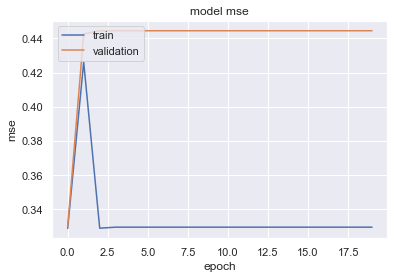

In [125]:
plt.plot(model1_story.history['mse'])
plt.plot(model1_story.history['val_loss'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [126]:
score_gl_test1 = model1.evaluate(test_text_pad, test['Action'], verbose=0)
score_gl_train1 = model1.evaluate(train_text_pad, train['Action'], verbose=0)
print('Train loss (mse):', score_gl_train1[0])
print('Train MSE:', score_gl_train1[1])
print('Test loss (mse):', score_gl_test1[0])
print('Test MSE:', score_gl_test1[1])

Train loss (mse): 0.3296296298503876
Train MSE: 0.3296296298503876
Test loss (mse): 0.4444444477558136
Test MSE: 0.4444444477558136


In [147]:
!pip install talos

In [144]:
!pip install scipy==1.4.1

  Attempting uninstall: scipy
    Found existing installation: scipy 1.2.0
    Uninstalling scipy-1.2.0:
      Successfully uninstalled scipy-1.2.0


In [4]:
import scipy


In [5]:
import talos

In [302]:
parameters = {
     'batch_size': [50,75,100],
     'epochs': [5,],
     'dropout': [0.1,],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'lr':[0.05,],
     'last_activation': ['sigmoid']}


In [219]:
!pip install livelossplot

In [6]:
from talos.utils import lr_normalizer
from tensorflow.keras.optimizers import Adam, SGD
from livelossplot.inputs.tf_keras import PlotLossesCallback

In [193]:
train['Action']=train['Action'].astype("category")
test['Action']=test['Action'].astype("category")

In [72]:
def my_model(x_train, y_train, x_val, y_val, params):
    
    embedding_layer = Embedding(vocabsize, 
    100,embeddings_initializer=Constant(glove_weights), 
    input_length=MAX_LEN, 
    trainable=False)
    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(100, dropout=params['dropout'], 
    recurrent_dropout=params['dropout']))
    model.add(Dense(1, 
    activation=params['last_activation']))
    model.compile(
    optimizer=params['optimizer']
    (lr=lr_normalizer(params['lr'],
    params['optimizer'])), loss=params['losses'], 
    metrics=['acc'])
    history = model.fit(x_train, y_train, 
    validation_data=(x_val, y_val),
    batch_size=params['batch_size'],
    epochs=params['epochs'], verbose=0)
    
    
    return history, model

In [306]:
scan_object=talos.Scan(x=train_text_pad, 
                       y=train['Action'],
                       x_val=test_text_pad,
                       y_val=test['Action'], 
                       model=my_model, 
                       experiment_name='itsec', 
                       params=parameters)


















  0%|          | 0/1 [00:00<?, ?it/s]
















100%|██████████| 1/1 [00:06<00:00,  6.14s/it]


In [301]:
test['Action']

101    1
181    1
248    1
251    1
272    0
128    1
17     1
285    0
106    0
11     1
135    1
137    1
86     1
87     1
313    0
25     1
287    0
80     0
28     1
43     0
209    1
36     0
71     0
176    0
215    0
145    1
294    0
355    0
317    0
81     0
72     0
188    1
118    0
67     1
49     0
274    0
10     1
157    0
24     0
61     1
46     0
191    1
220    0
246    1
193    0
265    0
97     0
62     1
305    0
311    0
82     1
168    0
104    0
121    0
327    0
161    1
99     0
133    0
241    0
293    0
325    0
153    1
198    1
23     1
31     0
345    0
22     0
12     0
163    0
256    0
74     1
92     1
225    0
56     0
77     1
105    1
116    1
333    0
289    0
322    0
205    0
195    1
226    1
277    1
120    1
3      1
117    1
38     0
238    1
64     1
Name: Action, dtype: int32

In [295]:
train['Action']

95     0
237    1
187    1
310    0
171    1
269    1
263    0
166    0
335    0
291    0
279    1
143    0
298    0
347    0
27     1
297    0
179    0
342    0
244    1
278    1
155    0
211    1
212    1
146    1
68     1
243    0
340    0
66     1
218    1
332    0
247    0
245    1
127    0
94     0
314    0
260    0
280    0
1      1
229    0
150    1
324    0
169    0
0      1
353    1
358    0
78     0
318    0
148    0
70     0
142    1
158    0
304    0
217    1
126    0
328    0
213    0
138    0
109    1
167    0
194    1
83     1
273    0
319    0
321    0
14     0
140    1
296    0
84     1
284    1
356    0
47     0
299    1
124    0
122    0
308    0
276    0
349    0
250    1
239    1
154    1
230    1
113    1
258    0
351    1
290    0
337    0
88     0
326    0
110    0
302    0
129    0
177    0
203    1
334    0
175    0
223    0
281    0
136    1
89     0
7      0
21     0
98     1
164    0
174    0
102    0
141    1
107    0
180    1
309    0
100    1
159    0
4

In [286]:
test['Action']

101    1
181    1
248    1
251    1
272    0
128    1
17     1
285    0
106    0
11     1
135    1
137    1
86     1
87     1
313    0
25     1
287    0
80     0
28     1
43     0
209    1
36     0
71     0
176    0
215    0
145    1
294    0
355    0
317    0
81     0
72     0
188    1
118    0
67     1
49     0
274    0
10     1
157    0
24     0
61     1
46     0
191    1
220    0
246    1
193    0
265    0
97     0
62     1
305    0
311    0
82     1
168    0
104    0
121    0
327    0
161    1
99     0
133    0
241    0
293    0
325    0
153    1
198    1
23     1
31     0
345    0
22     0
12     0
163    0
256    0
74     1
92     1
225    0
56     0
77     1
105    1
116    1
333    0
289    0
322    0
205    0
195    1
226    1
277    1
120    1
3      1
117    1
38     0
238    1
64     1
Name: Action, dtype: int32

In [236]:
scan_object.data[scan_object.data['loss']==min(scan_object.data['loss'])]

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,batch_size,dropout,epochs,last_activation,losses,lr,optimizer
17,08/10/21-165958,08/10/21-170019,21.219682,30,0.108087,0.97037,0.0,0.0,3,0.1,30,sigmoid,binary_crossentropy,0.15,<class 'tensorflow.python.keras.optimizer_v2.a...


In [242]:
best = {
     'batch_size': 3,
     'epochs': 30,
     'dropout': 0.1,
     'optimizer': Adam,
     'losses': 'binary_crossentropy',
     'lr':0.15,
     'last_activation': 'sigmoid'}

In [243]:
a,b=my_model(train_text_pad, train['Action'], test_text_pad, test['Action'], best)

In [246]:
myscore = b.evaluate(test_text_pad, test['Action'], verbose=0)

In [247]:
myscore

[0.9487194418907166, 0.7111111283302307]

In [248]:
pred=b.predict(test_text_pad)
pred

array([[8.2971978e-01],
       [2.2802588e-01],
       [9.5429182e-01],
       [4.8094124e-02],
       [3.9744377e-04],
       [1.9528687e-02],
       [1.0082722e-03],
       [1.2639761e-03],
       [7.8009367e-02],
       [8.3531505e-01],
       [6.4446235e-01],
       [9.6761644e-02],
       [5.8158690e-01],
       [7.6084942e-01],
       [4.3401748e-02],
       [3.1574279e-01],
       [8.4721744e-03],
       [2.5462657e-01],
       [9.6452397e-01],
       [6.7576831e-05],
       [5.3210449e-01],
       [1.4692545e-04],
       [1.2323290e-02],
       [5.9452266e-02],
       [6.8376827e-01],
       [1.4382601e-04],
       [1.9986600e-02],
       [1.0848284e-02],
       [3.9070845e-04],
       [2.9580623e-02],
       [2.5605559e-03],
       [4.8094124e-02],
       [4.4583738e-01],
       [1.0281879e-01],
       [9.2689283e-05],
       [1.1413395e-03],
       [1.2088731e-01],
       [9.2189759e-02],
       [1.8570045e-01],
       [8.9946496e-01],
       [9.2689283e-05],
       [2.119192

In [281]:
z=test['Action'].astype("int")
z.describe()

count    90.000000
mean      0.444444
std       0.499688
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Action, dtype: float64

In [277]:
frame2

,Real


In [282]:
frame = pd.DataFrame(data=pred.flatten(),columns=['Actionpred'])
frame2 = pd.DataFrame(data=z)
frame.reset_index(drop=True, inplace=True)
frame2.reset_index(drop=True, inplace=True)
myresults=pd.concat([frame,frame2],axis=1)
myresults


,Actionpred,Action
0,0.829720,1
1,0.228026,1
2,0.954292,1
3,0.048094,1
4,0.000397,0
5,0.019529,1
6,0.001008,1
7,0.001264,0
8,0.078009,0
9,0.835315,1


In [283]:
train['Action']=train['Action'].astype("int")
test['Action']=test['Action'].astype("int")

In [292]:
y_val=test['Action'].to_numpy()
y_val

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [293]:
scan_object=talos.Scan(x=train_text_pad, 
                       y=train['Action'],
                       x_val=test_text_pad,
                       y_val=y_val, 
                       model=my_model, 
                       experiment_name='itsec', 
                       params=parameters)

















  0%|          | 0/360 [00:00<?, ?it/s]















  0%|          | 1/360 [00:06<40:46,  6.82s/it]















  1%|          | 2/360 [00:12<38:37,  6.47s/it]















  1%|          | 3/360 [00:17<36:46,  6.18s/it]















  1%|          | 4/360 [00:26<41:14,  6.95s/it]















  1%|▏         | 5/360 [00:35<43:43,  7.39s/it]















  2%|▏         | 6/360 [00:43<46:07,  7.82s/it]















  2%|▏         | 7/360 [00:55<53:18,  9.06s/it]















  2%|▏         | 8/360 [01:07<58:00,  9.89s/it]















  2%|▎         | 9/360 [01:19<1:01:36, 10.53s/it]















  3%|▎         | 10/360 [01:34<1:08:41, 11.78s/it]















  3%|▎         | 11/360 [01:49<1:13:38, 12.66s/it]















  3%|▎         | 12/360 [02:04<1:18:01, 13.45s/it]















  4%|▎         | 13/360 [02:22<1:26:06, 14.89s/it]















  4%|▍         | 14/360 [02:41<1:32:04, 15.97s/it]















  4%|▍         | 15/360 [02:59

In [366]:
print(keras.__version__)

2.4.3


In [287]:
test_text_pad

array([[ 38,  66,   1,   1,   0,   0,   0,   0,   0,   0],
       [  2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   9, 261, 123,   0,   0,   0,   0,   0,   0],
       [  6,   1,   1,   0,   0,   0,   0,   0,   0,   0],
       [ 12,   4,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   1,   1,   0,   0,   0,   0,   0,   0,   0],
       [  3,  15, 105, 154,   0,   0,   0,   0,   0,   0],
       [ 31,   1,   1,   0,   0,   0,   0,   0,   0,   0],
       [ 38,  71,  76,   1,   0,   0,   0,   0,   0,   0],
       [421, 391,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 163,   1,   1,   0,   0,   0,   0,   0,   0],
       [  5,  64,   2,   0,   0,   0,   0,   0,   0,   0],
       [129,   1, 274, 275,   1,   0,   0,   0,   0,   0],
       [ 11, 366,   1,   1,   0,   0,   0,   0,   0,   0],
       [ 16,   1,   1,   1,   0,   0,   0,   0,   0,   0],
       [ 17,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   1,   0,   0,   0,   0,   0,   0,   0,   0

In [53]:
known1 = pd.read_csv("train.csv", error_bad_lines=False, encoding='latin1')

In [54]:
known1.head()

,id,img,Action,Comment
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [55]:
known1.describe()

,id,Action
count,8500.000000,8500.000000
mean,50006.595765,0.355176
std,28429.195025,0.478595
min,1235.000000,0.000000
25%,25840.000000,0.000000
50%,49834.000000,0.000000
75%,74332.250000,1.000000
max,98764.000000,1.000000


In [56]:
known1['Comment']=known1['Comment'].astype(str)

In [57]:
stop=stopwords.words("english")
stop.remove('not')

In [58]:
#cleaning text
def clean_text(text):
    ##Removing the  URLs

    text = re.sub(r" don t ", " do not ", text)
    text = re.sub(r"\ ve", " have ", text)
    text = re.sub(r"\ ll", " will ", text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)


 
    text = re.sub(r"(W|w)on(\'|\’)t ", "will not ", text)
    text = re.sub(r"(C|c)an(\'|\’)t ", "can not ", text)
    text = re.sub(r"(Y|y)(\'|\’)all ", "you all ", text)
    text = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", text)

    ## Removing the punctuation from the text
    text = text.translate(string.punctuation) 

    ## Converting all the words to lower case and splitting them
    text = text.lower().split()
    ## Remove stop words
 

    text = [w for w in text if not w in stop and len(w) >= 2]
    
    text = " ".join(text)
    

   
    
    return text


In [342]:
string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
z='asdfasd, safsadfa. , sfdadfa?:;'
print(clean_text(z))

asdfasd safsadfa sfdadfa


In [59]:
known1['Comment']=known1['Comment'].astype(str)
known1['Comment']=known1.apply(lambda  x: clean_text(x['Comment']) ,axis=1)
known1['Comment'].head(50)

0                           character not color matters
1                      afraid love everyone not like ex
2                                      putting bows pet
3     love everything everybody except squirrels hat...
4     everybody loves chocolate chip cookies even hi...
5                            go sports thing win points
6                               fine right fucking drop
7     tattoos bad health know million people tattoos...
8                          long run till chain tightens
9     hiding need see tax returns let stop right hil...
10                               jew mad get fuhrerious
11             removes polish chemicals nobody bats eye
12                 brother day without blast day wasted
13        dog left dog shelter black family wants adopt
14    voting hillary like letting casey anthony watc...
15                                            soon free
16               ok son daughter call another man daddy
17                            religions religion

In [60]:
# test train split
train1 ,test1 = train_test_split(known1, test_size=0.25, random_state=35)


print(train1.shape)
print(test1.shape)

(6375, 4)
(2125, 4)


In [61]:
#extracting the GloVe weights from the text file
embedding_dict={}
with open('glove.6B.100d.txt','r',encoding="utf8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [62]:
z=known1.apply(lambda  x: (x['Comment'].split()) ,axis=1)

In [63]:
mylen=z.apply(lambda  x: (len(x)))
mylen
max(mylen)
# number of max words is 7

46

In [64]:
sum(mylen)

53853

In [65]:
#padding
MAX_LEN=46
vocabsize=54000
tokenizer_obj=Tokenizer(num_words=vocabsize,oov_token=1)
tokenizer_obj.fit_on_texts(train1['Comment'])
sequences=tokenizer_obj.texts_to_sequences(train1['Comment'])
train_text_pad1=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

sequences_test=tokenizer_obj.texts_to_sequences(test1['Comment'])
test_text_pad1=pad_sequences(sequences_test,maxlen=MAX_LEN,truncating='post',padding='post')
print(train_text_pad1)
print(test_text_pad1)


[[2748  454  419 ...    0    0    0]
 [ 289   13 2082 ...    0    0    0]
 [  29  165   22 ...    0    0    0]
 ...
 [ 349   34   13 ...    0    0    0]
 [ 129  128  733 ...    0    0    0]
 [  10  419  246 ...    0    0    0]]
[[   1    1    1 ...    0    0    0]
 [   9    1    0 ...    0    0    0]
 [  16 1464 7217 ...    0    0    0]
 ...
 [  92  100  882 ...    0    0    0]
 [ 608  522    0 ...    0    0    0]
 [  58  186   33 ...    0    0    0]]


In [66]:
len(train_text_pad1)

6375

In [67]:
#from gensim.models import KeyedVectors
#from gensim.models.keyedvectors import Word2VecKeyedVectors
glove_weights, _ = get_embedding_matrix(tokenizer_obj, embedding_dict, vocabsize)

Created embedding matrix of shape (54000, 100)
Encountered 602 out-of-vocabulary words.


In [362]:
_

[1,
 'nahir',
 'tlaib',
 'idk',
 'muddin',
 'blowjob',
 'saggin',
 'handjobs',
 'musslamic',
 'selfie',
 'sexbomb',
 'getables',
 'handjob',
 'hungerstruck',
 'squirter',
 'lmao',
 'harambe',
 'getable',
 'retodd',
 'ancestrycom',
 'selfies',
 'hahaha',
 'terans',
 'goatshit',
 'nibba',
 'shithole',
 'cuck',
 'butthurt',
 'fkn',
 'manbun',
 'manditory',
 'lateridk',
 'ocasto',
 'sammich',
 'trannies',
 'jizz',
 'humpers',
 'tranpa',
 'pados',
 'faceswap',
 'doesh',
 'islamaphobic',
 'finna',
 'titties',
 'remeber',
 'matchcom',
 'crackas',
 'jewsy',
 'javeon',
 'doingbigthings',
 'everyrody',
 'antifa',
 'understan',
 'gnigger',
 'whitetrash',
 'kampfert',
 'anique',
 'buslim',
 'reichall',
 'unhumanrights',
 'welli',
 'thicc',
 'compilaion',
 'smollet',
 'trynna',
 'thawb',
 'shouldnt',
 'mosquee',
 'porkistan',
 'coffe',
 'tecnical',
 'blowjobs',
 'pornhub',
 'hahahaha',
 'peopple',
 'brithday',
 'mfw',
 'inmah',
 'ashol',
 'barbric',
 'whoopty',
 'resturant',
 'meowschwitz',
 'aight

In [363]:
parameters = {
     'batch_size': [50,75,100],
     'epochs': [10,15,20,25],
     'dropout': [0.1,0.15,0.2],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'lr':[0.05,0.1,0.15],
     'last_activation': ['sigmoid']}

In [367]:
scan_object=talos.Scan(x=train_text_pad1, 
                       y=train1['Action'],
                       x_val=test_text_pad1,
                       y_val=test1['Action'], 
                       model=my_model, 
                       experiment_name='itsec', 
                       params=parameters)



















  0%|          | 0/108 [00:00<?, ?it/s]

















  1%|          | 1/108 [01:19<2:21:02, 79.09s/it]

















  2%|▏         | 2/108 [02:41<2:21:28, 80.08s/it]

















  3%|▎         | 3/108 [04:09<2:24:07, 82.36s/it]

















  4%|▎         | 4/108 [06:15<2:45:40, 95.58s/it]

















  5%|▍         | 5/108 [08:36<3:07:30, 109.23s/it]

















  6%|▌         | 6/108 [10:55<3:20:49, 118.13s/it]

















  6%|▋         | 7/108 [13:48<3:46:16, 134.42s/it]

















  7%|▋         | 8/108 [16:50<4:08:14, 148.94s/it]

















  8%|▊         | 9/108 [19:53<4:22:32, 159.12s/it]

















  9%|▉         | 10/108 [23:41<4:53:32, 179.72s/it]

















 10%|█         | 11/108 [27:24<5:11:45, 192.84s/it]

















 11%|█         | 12/108 [31:15<5:26:27, 204.04s/it]

















 12%|█▏        | 13/108 [32:45<4:28:52, 169.82s/it]

















 13%|█▎        | 14/108 [34:12<3:47:18, 1

KeyboardInterrupt: 

In [22]:
parameters2 = {
     'batch_size': [40,60,80],
     'epochs': [10,40,45],
     'dropout': [0.02,0.04],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'lr':[0.20,0.25,0.3],
     'last_activation': ['sigmoid']}

In [24]:
scan_object2=talos.Scan(x=train_text_pad1, 
                       y=train1['Action'],
                       x_val=test_text_pad1,
                       y_val=test1['Action'], 
                       model=my_model, 
                       experiment_name='itsec', 
                       params=parameters2)


100%|██████████| 54/54 [3:34:35<00:00, 238.44s/it]


In [25]:
parameters3 = {
     'batch_size': [25,35,45],
     'epochs': [5,20,50],
     'dropout': [0.11,0.30],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'lr':[0.01,0.015,0.1],
     'last_activation': ['sigmoid']}

In [26]:
scan_object3=talos.Scan(x=train_text_pad1, 
                       y=train1['Action'],
                       x_val=test_text_pad1,
                       y_val=test1['Action'], 
                       model=my_model, 
                       experiment_name='itsec', 
                       params=parameters3)


100%|██████████| 54/54 [3:12:55<00:00, 214.36s/it]


In [27]:
parameters4 = {
     'batch_size': [70,80,90,100,110],
     'epochs': [8,16,24,32,50],
     'dropout': [0.01,0.08,0.45,0.50],
     'optimizer': [Adam],
     'losses': ['binary_crossentropy'],
     'lr':[0.01,0.015,0.1,0.3,0.4],
     'last_activation': ['sigmoid']}

In [28]:
scan_object4=talos.Scan(x=train_text_pad1, 
                       y=train1['Action'],
                       x_val=test_text_pad1,
                       y_val=test1['Action'], 
                       model=my_model, 
                       experiment_name='itsec', 
                       params=parameters4)


 38%|███▊      | 188/500 [9:01:02<13:49:57, 159.61s/it]

KeyboardInterrupt: 

bert model

In [7]:
known2 = pd.read_csv("train.csv", error_bad_lines=False, encoding='latin1')

In [8]:
bert=known2.copy()
bert_train ,bert_test = train_test_split(bert, test_size=0.25, random_state=35)
bert_train.reset_index(drop=True, inplace=True)
bert_test.reset_index(drop=True, inplace=True)

In [9]:
#there is a need for another cleaning header function since BERT needs to perform under raw header,.
a="I am doing computers coding machine learning consultant$$!!! x b. I am das "
#cleaning header
def clean_header_bert(text):
    ##Removing the  URLs

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r"\ re", " are ", text)
    text = re.sub(r" don t ", " do not ", text)
    text = re.sub(r"\ ve", " have ", text)
    text = re.sub(r"\ ll", " will ", text)
    text = re.sub(r"(W|w)on(\'|\’)t ", "will not ", text)
    text = re.sub(r"(C|c)an(\'|\’)t ", "can not ", text)
    text = re.sub(r"(Y|y)(\'|\’)all ", "you all ", text)
    text = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", text)
    text=re.sub('[^\w\s]', '',text)
    text=re.sub(r"\n","", text)
 
 

    
   
    
    return text


b=clean_header_bert(a)
b


'I am doing computers coding machine learning consultant x b I am das '

In [10]:
bert_train['Comment']=bert_train['Comment'].astype(str)
bert_train['Comment']=bert_train.apply(lambda  x: clean_header_bert(x['Comment']) ,axis=1)
bert_train['Comment'].head()

0    this is steve he lives with both parents who b...
1    she was born at the same time as mlk jr though...
2                         let me play with the muslims
3    chocolate good job it dosent make all children...
4    when youre not allowed to eat pork but youre s...
Name: Comment, dtype: object

In [11]:
bert_test['Comment']=bert_test['Comment'].astype(str)
bert_test['Comment']=bert_test.apply(lambda  x: clean_header_bert(x['Comment']) ,axis=1)
bert_test['Comment'].head()

0    gods chocen psychopaths living on stolen land ...
1                                     i see you nagger
2    i got kicked out of hogwarts for using black m...
3    muslims and jews to the fuck off department mu...
4    hey i just met you and this is crazy this is m...
Name: Comment, dtype: object

In [12]:
sentences_train = ["[CLS] " + sent + " [SEP]" for sent in  bert_train['Comment'].astype(str)]
sentences_test = ["[CLS] " + sent + " [SEP]" for sent in  bert_test['Comment'].astype(str)]

sentences_train[0], sentences_test[0]

('[CLS] this is steve he lives with both parents who both work no one in his family has a middle name in their facebook name like javeon doingbigthings jackson everyone in his family can swim [SEP]',
 '[CLS] gods chocen psychopaths living on stolen land armed and subsidized by the socalled jewish state [SEP]')

In [33]:
pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


In [13]:

import random
import re
import string 
#!pip install tensorflow
import tensorflow as tf
#!pip install tensorflow-hub
#!pip install pytorch-pretrained-bert

import tensorflow_hub as hub


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall, FalseNegatives, FalsePositives
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from pytorch_pretrained_bert import BertTokenizer
from tensorflow.keras.models import Model 


In [14]:
# using bert tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts_train = [tokenizer_bert.tokenize(sent) for sent in sentences_train]
tokenized_texts_test = [tokenizer_bert.tokenize(sent) for sent in sentences_test]

tokenized_texts_train[0], tokenized_texts_test[0]

(['[CLS]',
  'this',
  'is',
  'steve',
  'he',
  'lives',
  'with',
  'both',
  'parents',
  'who',
  'both',
  'work',
  'no',
  'one',
  'in',
  'his',
  'family',
  'has',
  'a',
  'middle',
  'name',
  'in',
  'their',
  'facebook',
  'name',
  'like',
  'ja',
  '##ve',
  '##on',
  'doing',
  '##bi',
  '##gt',
  '##hing',
  '##s',
  'jackson',
  'everyone',
  'in',
  'his',
  'family',
  'can',
  'swim',
  '[SEP]'],
 ['[CLS]',
  'gods',
  'cho',
  '##cen',
  'psycho',
  '##path',
  '##s',
  'living',
  'on',
  'stolen',
  'land',
  'armed',
  'and',
  'sub',
  '##si',
  '##di',
  '##zed',
  'by',
  'the',
  'soc',
  '##alle',
  '##d',
  'jewish',
  'state',
  '[SEP]'])

In [15]:
# the functions are taken from this helpful post:https://towardsdatascience.com/simple-bert-using-tensorflow-2-0-132cb19e9b22
def get_ids(tokens, tokenizer, max_seq_length):
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

def get_masks(tokens, max_seq_length):
    if len(tokens) > max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))

def get_segments(tokens, max_seq_length):
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

In [16]:
#for padding we need to find the longest sequence
def find_max_seq(list):
    x = [len(i) for i in list]
    return max(x)
    
longest_train = find_max_seq(tokenized_texts_train)
longest_test = find_max_seq(tokenized_texts_test)
print(longest_train, longest_test)

79 66


In [17]:
max_sequence_length=79

In [18]:
bert_train.head()

,id,img,Action,Comment
0,76358,img/76358.png,1,this is steve he lives with both parents who b...
1,23408,img/23408.png,0,she was born at the same time as mlk jr though...
2,41679,img/41679.png,1,let me play with the muslims
3,76491,img/76491.png,0,chocolate good job it dosent make all children...
4,46938,img/46938.png,0,when youre not allowed to eat pork but youre s...


In [ ]:
# constructing the inputs for training and test data
mask_ids_train = [] 
for i in range(len(tokenized_texts_train)):
    mask_ids_train.append(get_masks(tokenized_texts_train[i], 
max_sequence_length))
    
input_ids_train = []
for i in range(len(tokenized_texts_train)):
    input_ids_train.append(get_ids(tokenized_texts_train[i], 
tokenizer_bert, max_sequence_length))        


segments_ids_train = [] 
for i in range(len(tokenized_texts_train)):
    segments_ids_train.append(
    get_segments(tokenized_texts_train[i], 
    max_sequence_length))
   
      
 # covnerting lists to tensors for training set
input_ids_train = tf.convert_to_tensor(input_ids_train, 
                                       dtype = tf.int32)
mask_ids_train = tf.convert_to_tensor(mask_ids_train, 
                                      dtype = tf.int32)
segments_ids_train = tf.convert_to_tensor(segments_ids_train, 
                                          dtype = tf.int32)

random.seed(55)
# defining my 3 inputs as inputs to the model
input_id_layer = Input(shape = (max_sequence_length,), 
                       dtype = tf.int32, name = "InputIDs")
mask_id_layer = Input(shape = (max_sequence_length,), 
                      dtype = tf.int32, name = "MaskIDs")
segment_id_layer = Input(shape = (max_sequence_length,), 
                    dtype = tf.int32, name = "SegmentIDs")


# Importing the pre-trained uncased Bert model
bertLayer = hub.KerasLayer(
"https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", 
trainable=True)


pooled_output, sequence_output = 
bertLayer([input_id_layer, mask_id_layer, segment_id_layer])

first_output = Dropout(0.1)(pooled_output)
output = Dense(units = 500, activation = "tanh")(first_output)
output = Dropout(0.1)(output)
output = Dense(units = 1, activation = "sigmoid")(output)

bert_model = Model(inputs=[input_id_layer, mask_id_layer, 
                        segment_id_layer], outputs = output)

# Model Compilation
learning_rate = 3e-5
number_of_epochs = 3
optimizer = Adam(learning_rate = learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

          
         
bert_model.compile(optimizer = optimizer, 
              loss = loss,
              )


In [20]:
# constructing the inputs for training and test data
mask_ids_train = [] 
for i in range(len(tokenized_texts_train)):
    mask_ids_train.append(get_masks(tokenized_texts_train[i], max_sequence_length))
    
input_ids_train = []
for i in range(len(tokenized_texts_train)):
    input_ids_train.append(get_ids(tokenized_texts_train[i], tokenizer_bert, max_sequence_length))        


segments_ids_train = [] 
for i in range(len(tokenized_texts_train)):
    segments_ids_train.append(get_segments(tokenized_texts_train[i], max_sequence_length))
   
    
    

#test
mask_ids_test = [] 
for i in range(len(tokenized_texts_test)):
    mask_ids_test.append(get_masks(tokenized_texts_test[i], max_sequence_length))
    
input_ids_test = []
for i in range(len(tokenized_texts_test)):
    input_ids_test.append(get_ids(tokenized_texts_test[i], tokenizer_bert, max_sequence_length))        


segments_ids_test = [] 
for i in range(len(tokenized_texts_test)):
    segments_ids_test.append(get_segments(tokenized_texts_test[i], max_sequence_length))
   
    

    


In [21]:
# covnerting lists to tensors for training set
input_ids_train = tf.convert_to_tensor(input_ids_train, dtype = tf.int32)
mask_ids_train = tf.convert_to_tensor(mask_ids_train, dtype = tf.int32)
segments_ids_train = tf.convert_to_tensor(segments_ids_train, dtype = tf.int32)


#test set convertion
input_ids_test = tf.convert_to_tensor(input_ids_test, dtype = tf.int32)
mask_ids_test = tf.convert_to_tensor(mask_ids_test, dtype = tf.int32)
segments_ids_test = tf.convert_to_tensor(segments_ids_test, dtype = tf.int32)



In [47]:
random.seed(55)
# defining my 3 inputs as inputs to the model
input_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "InputIDs")
mask_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "MaskIDs")
segment_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "SegmentIDs")


# Importing the pre-trained uncased Bert model with 12 attention heads
bertLayer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=True)


pooled_output, sequence_output = bertLayer([input_id_layer, mask_id_layer, segment_id_layer])

first_output = Dropout(0.1)(pooled_output)
output = Dense(units = 500, activation = "tanh")(first_output)
output = Dropout(0.1)(output)
output = Dense(units = 1, activation = "sigmoid")(output)

bert_model = Model(inputs=[input_id_layer, mask_id_layer, segment_id_layer], outputs = output)



In [49]:
output

<tf.Tensor 'dense_11/Sigmoid:0' shape=(None, 1) dtype=float32>

In [52]:
# Model Compilation
learning_rate = 3e-5
number_of_epochs = 3
optimizer = Adam(learning_rate = learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

          
         
bert_model.compile(optimizer = optimizer, 
              loss = loss,
              )


In [53]:
# Model Training & Fine-Tuning on train data
#earlyStopping = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)

model_title_bert1_story = bert_model.fit([input_ids_train, mask_ids_train, segments_ids_train], [bert_train['Action']],
                         epochs = number_of_epochs, 
                         batch_size = 32,
                         #callbacks = [earlyStopping],
                                   validation_data=([input_ids_test, mask_ids_test, segments_ids_test], [bert_test['Action']])
                         )

Epoch 1/3
200/200 [==============================] - 2096s 10s/step - loss: 0.5689 - val_loss: 0.4907
Epoch 2/3
200/200 [==============================] - 2079s 10s/step - loss: 0.4433 - val_loss: 0.5116
Epoch 3/3
200/200 [==============================] - 2122s 11s/step - loss: 0.3077 - val_loss: 0.6080


In [54]:
prediction12 = bert_model.predict([input_ids_test, mask_ids_test, segments_ids_test])

In [55]:
prediction12

array([[0.9542091 ],
       [0.79259133],
       [0.96447694],
       ...,
       [0.5322738 ],
       [0.5105926 ],
       [0.17145753]], dtype=float32)

In [56]:
bert_test['Action']

0       1
1       1
2       0
3       1
4       1
       ..
2120    0
2121    0
2122    0
2123    1
2124    1
Name: Action, Length: 2125, dtype: int64

In [31]:
random.seed(55)
# defining my 3 inputs as inputs to the model
input_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "InputIDs")
mask_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "MaskIDs")
segment_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "SegmentIDs")


# Importing the pre-trained uncased Bert model with 12 attention heads
bertLayer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=True)


pooled_output, sequence_output = bertLayer([input_id_layer, mask_id_layer, segment_id_layer])

first_output = Dropout(0.1)(pooled_output)
output = Dense(units = 500, activation = "tanh")(first_output)
output = Dropout(0.1)(output)
output = Dense(units = 1, activation = "sigmoid")(output)

bert_model = Model(inputs=[input_id_layer, mask_id_layer, segment_id_layer], outputs = output)

In [32]:
# Model Compilation
learning_rate = 1e-5
number_of_epochs = 1
optimizer = Adam(learning_rate = learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

          
         
bert_model.compile(optimizer = optimizer, 
              loss = loss,
              )


In [33]:


model_title_bert1_story2 = bert_model.fit([input_ids_train, mask_ids_train, segments_ids_train], [bert_train['Action']],
                         epochs = number_of_epochs, 
                         batch_size = 20,
                                   validation_data=([input_ids_test, mask_ids_test, segments_ids_test], [bert_test['Action']])
                         )

319/319 [==============================] - 2474s 8s/step - loss: 0.5684 - val_loss: 0.5074


In [78]:
validation = pd.read_csv("itsecdata2.csv")

In [79]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Comment                    358 non-null    object
 1   Specific Group             349 non-null    object
 2   Hate Speech Category       358 non-null    int64 
 3   Time difference            130 non-null    object
 4   Action                     358 non-null    int64 
 5   Additional Action          13 non-null     object
 6   Specific word              216 non-null    object
 7   count of unwanted phrases  358 non-null    int64 
 8   severe words               358 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 25.3+ KB


In [80]:
validation_bert=validation.copy()

In [81]:
validation_bert.reset_index(drop=True, inplace=True)

In [82]:
validation_bert['Comment']=validation_bert['Comment'].astype(str)
validation_bert['Comment']=validation_bert.apply(lambda  x: clean_header_bert(x['Comment']) ,axis=1)
validation_bert['Comment'].head()

0             Russians are useless for our economy
1                       These germans make me sick
2    I believe that whites are better than latinos
3                   Turkish people are cockroaches
4                           Arabs are sand niggers
Name: Comment, dtype: object

In [83]:
sentences_validation = ["[CLS] " + sent + " [SEP]" for sent in  validation_bert['Comment'].astype(str)]

In [84]:
tokenized_texts_validation = [tokenizer_bert.tokenize(sent) for sent in sentences_validation]

In [85]:
longest_validation = find_max_seq(tokenized_texts_validation)
longest_validation

16

In [86]:
#validation
mask_ids_validation = [] 
for i in range(len(tokenized_texts_validation)):
    mask_ids_validation.append(get_masks(tokenized_texts_validation[i], max_sequence_length))
    
input_ids_validation = []
for i in range(len(tokenized_texts_validation)):
    input_ids_validation.append(get_ids(tokenized_texts_validation[i], tokenizer_bert, max_sequence_length))        


segments_ids_validation = [] 
for i in range(len(tokenized_texts_validation)):
    segments_ids_validation.append(get_segments(tokenized_texts_validation[i], max_sequence_length))

In [87]:
input_ids_validation = tf.convert_to_tensor(input_ids_validation, dtype = tf.int32)
mask_ids_validation = tf.convert_to_tensor(mask_ids_validation, dtype = tf.int32)
segments_ids_validation = tf.convert_to_tensor(segments_ids_validation, dtype = tf.int32)

In [88]:
prediction_bert = bert_model.predict([input_ids_validation, mask_ids_validation, segments_ids_validation])

In [89]:
prediction_bert

array([[0.39368027],
       [0.73779684],
       [0.8114155 ],
       [0.43883732],
       [0.9037812 ],
       [0.7774686 ],
       [0.67637247],
       [0.826054  ],
       [0.69763505],
       [0.78227615],
       [0.5656053 ],
       [0.85346615],
       [0.736168  ],
       [0.41486645],
       [0.46585235],
       [0.83864987],
       [0.8913791 ],
       [0.26847216],
       [0.50261086],
       [0.71693844],
       [0.84381586],
       [0.6653787 ],
       [0.7429619 ],
       [0.42066061],
       [0.79575944],
       [0.60772544],
       [0.63409835],
       [0.63942987],
       [0.44762382],
       [0.52807754],
       [0.47311333],
       [0.26640135],
       [0.34778523],
       [0.77583647],
       [0.6213325 ],
       [0.405421  ],
       [0.35703602],
       [0.3405605 ],
       [0.42378294],
       [0.3444994 ],
       [0.3859109 ],
       [0.7129803 ],
       [0.48618758],
       [0.50320995],
       [0.49269557],
       [0.6722748 ],
       [0.44925177],
       [0.459

In [90]:
frame_bert = pd.DataFrame(data=prediction_bert.flatten(),columns=['bert_prediction'])
frame_bert.reset_index(drop=True, inplace=True)
frame_bert

,bert_prediction
0,0.393680
1,0.737797
2,0.811415
3,0.438837
4,0.903781
5,0.777469
6,0.676372
7,0.826054
8,0.697635
9,0.782276


In [91]:
frame_bert.to_csv('bert_prediction.csv',index=False)

In [92]:
best = {
     'batch_size': 70,
     'epochs': 50,
     'dropout': 0.5,
     'optimizer': Adam,
     'losses': 'binary_crossentropy',
     'lr':0.4,
     'last_activation': 'sigmoid'}

In [93]:
validation['Comment']=validation['Comment'].astype(str)
validation['Comment']=validation.apply(lambda  x: clean_text(x['Comment']) ,axis=1)
validation['Comment'].head(50)

0                      russians useless economy
1                             germans make sick
2                 believe whites better latinos
3                    turkish people cockroaches
4                            arabs sand niggers
5                      turks must thrown europe
6                       syrian refugees leeches
7                           germans marry turks
8          hate seeing turkish shops everywhere
9                     shisha shops closed turks
10           niggas eating watermelon whole day
11                                 latinos lazy
12                             latinos ruin usa
13                        americans blood hands
14                     turkish people full hate
15                arabs disturb every community
16                   jewish people devils earth
17                      people usa deserve live
18                               germans boring
19                turks create chaos everywhere
20                            europe nee

In [94]:


sequences_validation=tokenizer_obj.texts_to_sequences(validation['Comment'])
validation_text_pad1=pad_sequences(sequences_validation,maxlen=MAX_LEN,truncating='post',padding='post')

print(validation_text_pad1)

[[1492    1 1275 ...    0    0    0]
 [   1   14  616 ...    0    0    0]
 [ 219  775  115 ...    0    0    0]
 ...
 [ 180  154  844 ...    0    0    0]
 [   1  600  316 ...    0    0    0]
 [   1  110    1 ...    0    0    0]]


In [95]:
a,b=my_model(train_text_pad1, train1['Action'], validation_text_pad1, validation['Action'], best)

In [96]:
prediction_lstm=b.predict(validation_text_pad1)
prediction_lstm

array([[0.2822191 ],
       [0.12687075],
       [0.8090491 ],
       [0.16594717],
       [0.9647063 ],
       [0.58015627],
       [0.36568236],
       [0.61699015],
       [0.17731068],
       [0.5201142 ],
       [0.08636528],
       [0.6577923 ],
       [0.60518   ],
       [0.3441171 ],
       [0.1462608 ],
       [0.56367743],
       [0.6264142 ],
       [0.38766584],
       [0.19386238],
       [0.47418562],
       [0.76886046],
       [0.41232306],
       [0.75366104],
       [0.16334456],
       [0.83458555],
       [0.23253012],
       [0.15367362],
       [0.10456198],
       [0.22204116],
       [0.10605001],
       [0.13926578],
       [0.19080064],
       [0.27707577],
       [0.5711954 ],
       [0.3873812 ],
       [0.4318384 ],
       [0.27072376],
       [0.24552411],
       [0.32067284],
       [0.12487623],
       [0.27040476],
       [0.46672437],
       [0.38355845],
       [0.43131167],
       [0.35116342],
       [0.3780668 ],
       [0.33236188],
       [0.354

In [97]:
frame_lstm = pd.DataFrame(data=prediction_lstm.flatten(),columns=['lstm_prediction'])
frame_lstm.reset_index(drop=True, inplace=True)
frame_lstm

,lstm_prediction
0,0.282219
1,0.126871
2,0.809049
3,0.165947
4,0.964706
5,0.580156
6,0.365682
7,0.616990
8,0.177311
9,0.520114


In [98]:

frame_real = pd.DataFrame(data=validation['Action'])
frame_real.reset_index(drop=True, inplace=True)
myresults=pd.concat([frame_bert,frame_lstm,frame_real],axis=1)
myresults


,bert_prediction,lstm_prediction,Action
0,0.393680,0.282219,1
1,0.737797,0.126871,1
2,0.811415,0.809049,1
3,0.438837,0.165947,1
4,0.903781,0.964706,1
5,0.777469,0.580156,0
6,0.676372,0.365682,1
7,0.826054,0.616990,0
8,0.697635,0.177311,0
9,0.782276,0.520114,0


In [99]:
myresults.to_csv('prediction_results.csv',index=False)